In [ ]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '//content//drive//MyDrive//tmp 1//Gambo//Train'
validation_dir = '//content//drive//MyDrive//tmp 1//Gambo//Validation'
import os
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory not found: {train_dir}")
if not os.path.exists(validation_dir):
    raise FileNotFoundError(f"Validation directory not found: {validation_dir}")

train_datagen = ImageDataGenerator(
    rescale=1./255)



validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode="grayscale",
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',


)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    color_mode="grayscale",
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',

)

Found 151649 images belonging to 3 classes.
Found 15114 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,074,883 (4.10 MB)

 Trainable params: 1,074,883 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)


history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    callbacks=[checkpoint]
)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5095 - loss: 0.9736
Epoch 1: val_loss improved from inf to 0.80053, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 252s 10s/step - accuracy: 0.5139 - loss: 0.9692 - val_accuracy: 0.6484 - val_loss: 0.8005
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7112 - loss: 0.6951
Epoch 2: val_loss improved from 0.80053 to 0.74656, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 173s 9s/step - accuracy: 0.7109 - loss: 0.6952 - val_accuracy: 0.6734 - val_loss: 0.7466
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7604 - loss: 0.5672
Epoch 3: val_loss improved from 0.74656 to 0.64790, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 153s 8s/step - accuracy: 0.7605 - loss: 0.5680 - val_accuracy: 0.7594 - val_loss: 0.6479
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8374 - loss: 0.4835
Epoch 4: val_loss did not improve from 0.64790
20/20 ━━━━━━━━━━━━━━━

In [ ]:
model.save('my_model.h5')
test_dir='//content//drive//MyDrive//tmp 1//Gambo//Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    color_mode="grayscale",
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',


)

Found 56723 images belonging to 3 classes.


In [ ]:
model.evaluate(
    test_generator,
    batch_size=40,
    steps=20,

)

 1/20 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.7812 - loss: 0.5019

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.7732 - loss: 0.5245


[0.5221331715583801, 0.7828124761581421]

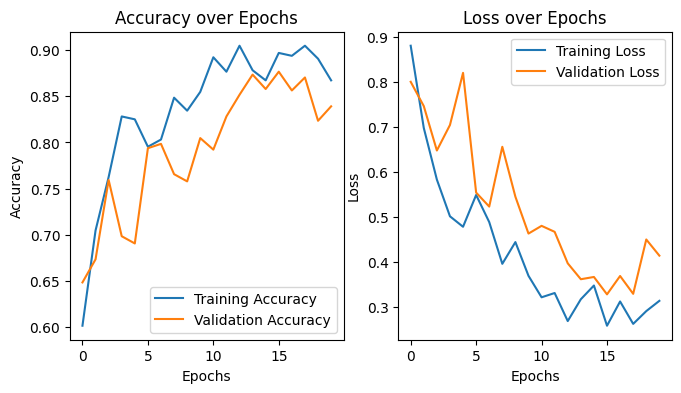

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()


In [ ]:
import cv2
import numpy as np
import os

# تحديد مسار المجلد الذي يحتوي على الصور
input_folder = '/content/drive/MyDrive/tmp 1'
output_folder = 'temp'

# إنشاء مجلد لحفظ النتائج إن لم يكن موجودًا
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# تعريف Kernel للتنعيم
kernel = np.ones((5, 5), np.float32) / 25

# الحصول على قائمة بأسماء ملفات الصور
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # يمكنك إضافة المزيد من امتدادات الصور
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path, 0)  # قراءة الصورة كصورة رمادية

        # تطبيق الالتفاف
        dst = cv2.filter2D(img, -1, kernel)

        # حفظ الصورة الناتجة
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, dst)
cv2.imshow('Original', img)
cv2.imshow('Blurred', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()